<font face="黑体" size=5>月度产销差漏损率分析报告图表</font> 

***author: 谢杰***<br/>

In [1]:
#调入常用包
%matplotlib inline
import seaborn as sns
#sns.set_theme(style="whitegrid")
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os
#查看当前目录
os.getcwd()

'C:\\Users\\xiejie\\mypyworks\\jupyter文件'

## 计划总体控制图

In [2]:

#读取excel位置
import xlrd
rb = xlrd.open_workbook(u'D:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx')
sheet = rb.sheet_by_index(0)
sheet.name

'月_总体控制'

In [3]:
def FloatOrNan(value):
    try:
        return float(value)
    except:
        return np.nan
yuefen = [str(x.value) for x in sheet.col(0)[2:14]]
gongsi_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(1)[2:14]]))
gongsi_shiji= list(map(FloatOrNan,[x.value for x in sheet.col(2)[2:14]]))
gongsi_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(3)[2:14]]))
gongsi_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(5)[2:14]]))

zhongqu_jihua = list( map(FloatOrNan,[x.value for x in sheet.col(11)[2:14]]))
zhongqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(12)[2:14]]))
zhongqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(14)[2:14]]))
zhongqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(13)[2:14]]))

dongqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(19)[2:14]]))
dongqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(20)[2:14]]))
dongqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(22)[2:14]]))
dongqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(21)[2:14]]))

nanqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(27)[2:14]]))
nanqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(28)[2:14]]))
nanqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(30)[2:14]]))
nanqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(29)[2:14]]))

beiqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(35)[2:14]]))
beiqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(36)[2:14]]))
beiqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(38)[2:14]]))
beiqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(37)[2:14]]))

## 公司

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

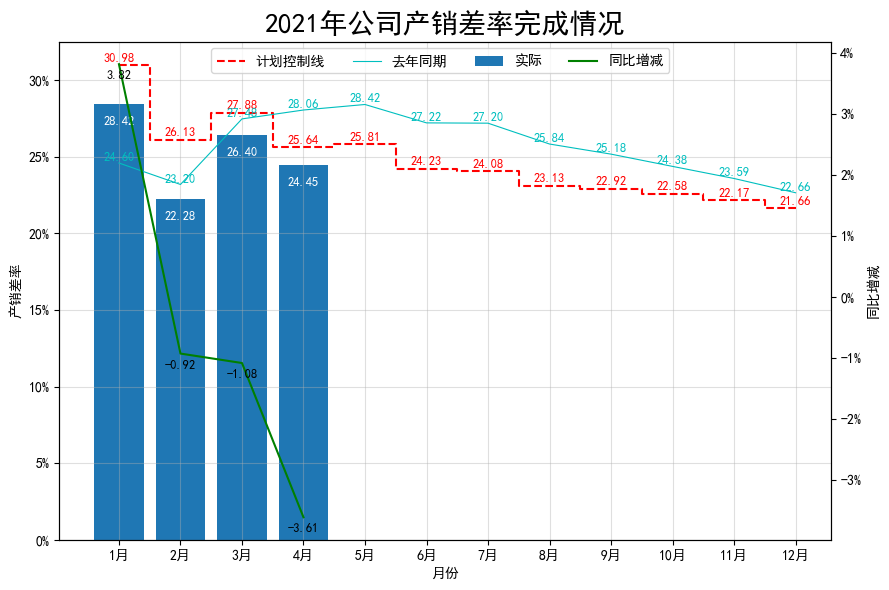

In [5]:

#ha水平对齐：right,center,left
#va垂直对齐：'top', 'bottom', 'center', 'baseline'
from matplotlib import ticker
fig,ax= plt.subplots(figsize=(9,6),dpi=100)
plt.grid(alpha=0.4)
plt.title('2021年公司产销差率完成情况',fontsize=20)
plt.step(x=yuefen, y=gongsi_jihua,where='mid',color='r',label='计划控制线',linestyle='dashed')
for x,y in zip(yuefen,gongsi_jihua):
 plt.text(x, y+0.001, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='r')

plt.bar(x=yuefen,height=gongsi_shiji,label='实际')
for x,y in zip(yuefen,gongsi_shiji):
 plt.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='w')

plt.plot(yuefen,gongsi_tongqi,label='去年同期',color='c', linewidth=0.8)
for x,y in zip(yuefen,gongsi_tongqi):
 plt.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='c')

ax.set_xlabel("月份")
ax.set_ylabel("产销差率")
ax2 = ax.twinx()

ax2.plot(yuefen, gongsi_tongbi, color="g", label="同比增减")
for x,y in zip(yuefen,gongsi_tongbi):
 plt.text(x, y-0.001, '{:.2f}'.format(y*100), ha='center', va= 'top',fontsize=9,color='black')

ax2.set_ylabel("同比增减")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
fig.legend(loc="upper right", bbox_to_anchor=(0.8, 1), bbox_transform=ax.transAxes,ncol=4)
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\公司完成情况.svg')


## 各分公司

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

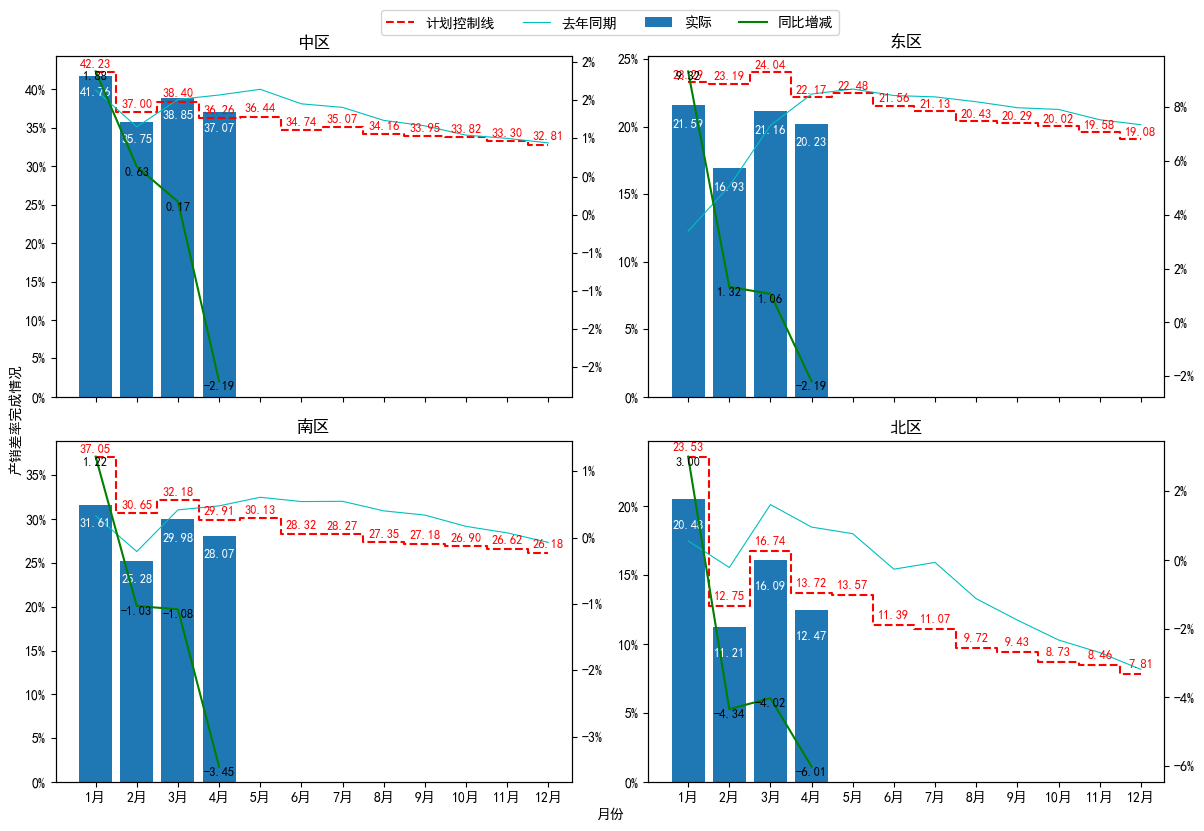

In [6]:
fig, axes = plt.subplots(2,2, figsize=(12, 8),dpi=100,sharex=True)
ax1,ax2,ax3,ax4=axes.flatten()
ax1.set_title('中区')
ax1.step(x=yuefen, y=zhongqu_jihua,where='mid',color='r',label='计划控制线',linestyle='dashed')
for x,y in zip(yuefen,zhongqu_jihua):
 ax1.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax1.bar(x=yuefen,height=zhongqu_shiji,label='实际')
for x,y in zip(yuefen,zhongqu_shiji):
 ax1.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax1.plot(yuefen,zhongqu_tongqi,label='去年同期',color='c', linewidth=0.8)
ax1_2 = ax1.twinx()
ax1_2.plot(yuefen, zhongqu_tongbi, color="g", label="同比增减")
for x,y in zip(yuefen,zhongqu_tongbi):
 ax1_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax1_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax2.set_title('东区')
ax2.step(x=yuefen, y=dongqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,dongqu_jihua):
 ax2.text(x, y+0.001, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax2.bar(x=yuefen,height=dongqu_shiji)
for x,y in zip(yuefen,dongqu_shiji):
 ax2.text(x, y-0.01, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax2.plot(yuefen,dongqu_tongqi,color='c', linewidth=0.8)
ax2_2 = ax2.twinx()
ax2_2.plot(yuefen, dongqu_tongbi, color="g")
for x,y in zip(yuefen,dongqu_tongbi):
 ax2_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax2_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax3.set_title('南区')
ax3.step(x=yuefen, y=nanqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,nanqu_jihua):
 ax3.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax3.bar(x=yuefen,height=nanqu_shiji)
for x,y in zip(yuefen,nanqu_shiji):
 ax3.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax3.plot(yuefen,nanqu_tongqi,color='c', linewidth=0.8)
ax3_2 = ax3.twinx()
ax3_2.plot(yuefen, nanqu_tongbi, color="g")
for x,y in zip(yuefen,nanqu_tongbi):
 ax3_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax3_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax4.set_title('北区')
ax4.step(x=yuefen, y=beiqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,beiqu_jihua):
 ax4.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax4.bar(x=yuefen,height=beiqu_shiji)
for x,y in zip(yuefen,beiqu_shiji):
 ax4.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax4.plot(yuefen,beiqu_tongqi,color='c', linewidth=0.8)
ax4_2 = ax4.twinx()
ax4_2.plot(yuefen, beiqu_tongbi, color="g")
for x,y in zip(yuefen,beiqu_tongbi):
 ax4_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax4_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
fig.text(0.5, 0, '月份', ha='center')
fig.text(0, 0.5, '产销差率完成情况', va='center', rotation='vertical')
fig.legend(loc="upper center",ncol=4, bbox_to_anchor=(0.5, 1.02))
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\完成情况.svg')
#plt.savefig(r'c:\Users\XieJie\Desktop\完成情况.png',dpi=500,bbox_inches ='tight')


## 公司激励区间图

In [7]:
#设置计划
#4月份计划
a1=np.array([[x,y,z]  for x in ['中区','东区','南区','北区'] for y in ['计划','实际','同期']  for z in yuefen])
a2=np.array(zhongqu_jihua+zhongqu_shiji+zhongqu_tongqi+dongqu_jihua+dongqu_shiji+dongqu_tongqi+nanqu_jihua+nanqu_shiji+nanqu_tongqi+ beiqu_jihua+beiqu_shiji+beiqu_tongqi).reshape(-1,1)
data_melt = pd.concat([pd.DataFrame(a1,columns=['分公司','指标','月份']),pd.DataFrame(a2,columns=['数值'])],axis=1)

In [8]:
#修改月份
zhonglist=[data_melt.query("月份=='4月'&指标=='实际'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='计划'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='中区'").iloc[0,3]]
donglist=[data_melt.query("月份=='4月'&指标=='实际'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='计划'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='东区'").iloc[0,3]]
nanlist=[data_melt.query("月份=='4月'&指标=='实际'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='计划'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='南区'").iloc[0,3]]
beilist=[data_melt.query("月份=='4月'&指标=='实际'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='计划'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='北区'").iloc[0,3]]

zhongcol = str(np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='中区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='计划'&分公司=='中区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='中区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='同期'&分公司=='中区'").iloc[0,3],'y','r')))
dongcol = str(np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='东区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='计划'&分公司=='东区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='东区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='同期'&分公司=='东区'").iloc[0,3],'y','r')))
nancol = str(np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='南区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='计划'&分公司=='南区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='南区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='同期'&分公司=='南区'").iloc[0,3],'y','r')))
beicol = str(np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='北区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='计划'&分公司=='北区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='4月'&指标=='实际'&分公司=='北区'").iloc[0,3])<data_melt.query("月份=='4月'&指标=='同期'&分公司=='北区'").iloc[0,3],'y','r')))

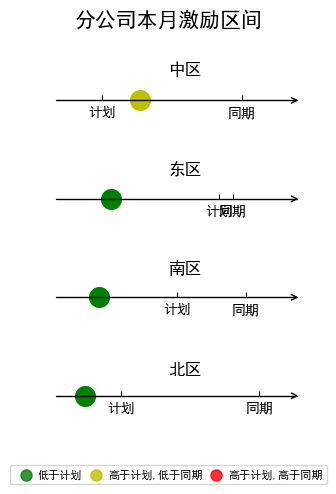

In [9]:
#fig,ax= plt.subplots(figsize=(7,0.2),dpi=100)
import mpl_toolkits.axisartist as axisartist
fig = plt.figure(figsize=(3,5),dpi=100)

ax1 = axisartist.Subplot(fig, 411) 
fig.add_axes(ax1)
ax1.axis[:].set_visible(False)
ax1.axis["x"] = ax1.new_floating_axis(0,0)
ax1.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax1.scatter(x=data_melt.query("月份=='4月'&指标=='实际'&分公司=='中区'").iloc[0,3],y=0,s=200,c=zhongcol)
ax1.set(xticks=[data_melt.query("月份=='4月'&指标=='计划'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='中区'").iloc[0,3]],
      xticklabels=['计划','同期'],       
     
     xlim=[min(zhonglist)-0.01,max(zhonglist)+0.01] )
fig.text(0.5,0.85,'中区',fontsize=12)

ax2 = axisartist.Subplot(fig, 412) 
fig.add_axes(ax2)
ax2.axis[:].set_visible(False)
ax2.axis["x"] = ax2.new_floating_axis(0,0)
ax2.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax2.scatter(x=data_melt.query("月份=='4月'&指标=='实际'&分公司=='东区'").iloc[0,3],y=0,s=200,c=dongcol)
ax2.set(xticks=[data_melt.query("月份=='4月'&指标=='计划'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='东区'").iloc[0,3]],
      xticklabels=['计划','同期'],
      xlim=[min(donglist)-0.01,max(donglist)+0.01]
        )
fig.text(0.5,0.65,'东区',fontsize=12)

ax3 = axisartist.Subplot(fig, 413) 
fig.add_axes(ax3)
ax3.axis[:].set_visible(False)
ax3.axis["x"] = ax3.new_floating_axis(0,0)
ax3.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax3.scatter(x=data_melt.query("月份=='4月'&指标=='实际'&分公司=='南区'").iloc[0,3],y=0,s=200,c=nancol)
ax3.set(xticks=[data_melt.query("月份=='4月'&指标=='计划'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='南区'").iloc[0,3]],
      xticklabels=['计划','同期'],
        xlim=[min(nanlist)-0.01,max(nanlist)+0.01]
       )
fig.text(0.5,0.45,'南区',fontsize=12)

ax4 = axisartist.Subplot(fig, 414) 
fig.add_axes(ax4)
ax4.axis[:].set_visible(False)
ax4.axis["x"] = ax4.new_floating_axis(0,0)
ax4.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax4.scatter(x=data_melt.query("月份=='4月'&指标=='实际'&分公司=='北区'").iloc[0,3],y=0,s=200,c=beicol)
ax4.set(xticks=[data_melt.query("月份=='4月'&指标=='计划'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='4月'&指标=='同期'&分公司=='北区'").iloc[0,3]],
      xticklabels=['计划','同期'],
      xlim=[min(beilist)-0.01,max(beilist)+0.01]
       )
fig.text(0.5,0.25,'北区',fontsize=12)
for col,explain in zip(['g', 'y', 'r'],['低于计划', '高于计划,低于同期','高于计划,高于同期']):
    ax1.scatter([], [], c=col, alpha=0.8,s=100,
                label=explain)
fig.legend(loc="center", bbox_to_anchor=(0.50,0.05),ncol=3,labelspacing=0.1,columnspacing=0.2,handletextpad=0.1,markerscale=0.8,prop = {'size':8})
#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
fig.suptitle("分公司本月激励区间",fontsize=15)
#fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\分公司累计本月激励奖励区间.svg')

### 片区激励图

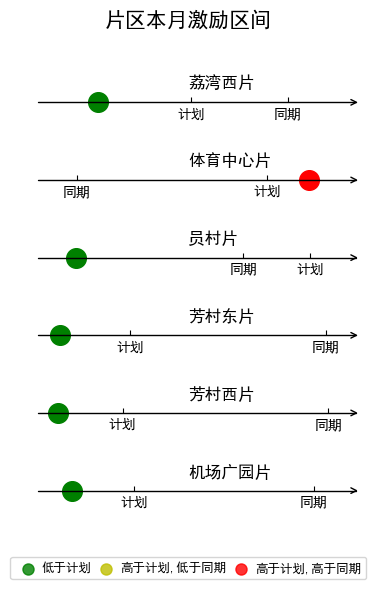

In [10]:
#读取excel位置
import xlrd
rb = xlrd.open_workbook(u'D:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx')
sheet = rb.sheet_by_index(1)

def FloatOrNan(value):
    try:
        return float(value)
    except:
        return np.nan

pianqu = [x.value for x in sheet.col(2)[35:41]]
shiji = [float(x.value) for x in sheet.col(7)[35:41]]
jihua = [float(x.value/100) for x in sheet.col(9)[35:41]]
tongqi = [float(x.value) for x in sheet.col(10)[35:41]]
col=[]
for i in range(6):
    col.append(str(np.where(shiji[i]<jihua[i],'g',np.where(shiji[i]<tongqi[i],'y','r'))))

#gongsi_shiji= list(map(FloatOrNan,[x.value for x in sheet.col(2)[2:14]]))


import mpl_toolkits.axisartist as axisartist
fig = plt.figure(figsize=(4,6),dpi=100)

ax1 = axisartist.Subplot(fig, 611) 
ax2 = axisartist.Subplot(fig, 612)
ax3 = axisartist.Subplot(fig, 613)
ax4 = axisartist.Subplot(fig, 614)
ax5 = axisartist.Subplot(fig, 615)
ax6 = axisartist.Subplot(fig, 616)

axes = [ax1,ax2,ax3,ax4,ax5,ax6]

for a,i in zip(axes,range(6)):
    fig.add_axes(a)
    fig.text(0.5,0.85-0.13*i,pianqu[i],fontsize=12)
    a.axis[:].set_visible(False)
    a.axis["x"] = a.new_floating_axis(0,0)
    a.axis["x"].set_axisline_style("->", size = 1.0),    
    a.scatter(x=shiji[i],y=0,s=200,c=col[i])    
    a.set(xticks=[jihua[i],tongqi[i]],
      xticklabels=['计划','同期'],      
      xlim=[min(shiji[i],jihua[i],tongqi[i])-0.01,max(shiji[i],jihua[i],tongqi[i])+0.01])
    
for col,explain in zip(['g', 'y', 'r'],['低于计划', '高于计划,低于同期','高于计划,高于同期']):
    ax1.scatter([], [], c=col, alpha=0.8,s=100,
                label=explain)
fig.legend(loc="center", bbox_to_anchor=(0.50,0.05),ncol=3,labelspacing=0.1,columnspacing=0.2,handletextpad=0.1,markerscale=0.8,prop = {'size':9})

fig.suptitle("片区本月激励区间",fontsize=15)
plt.savefig(r'c:\Users\XieJie\Desktop\片区累计本月激励奖励区间.svg')

## 水量平衡表旭日图

In [12]:
import pyecharts
print(pyecharts.__version__)
#水量平衡表旭日图
from pyecharts.charts import Sunburst
from pyecharts import options as opts

1.9.0


In [13]:
data = [
    opts.SunburstItem(
        name="注册用水量",                                #第1层级
        children=[
            opts.SunburstItem(                       #1.1层级
                name="计费用水",                
                children=[
                    opts.SunburstItem(name="计量用水", value=1187494203),#1.1.1层级
                    opts.SunburstItem(name="未计量用水",value=53351685)
                    
                ],
            ),
            opts.SunburstItem(
                name="免费用水", #1.2层级               
                children=[
                    opts.SunburstItem(name="计量", value=0),
                    opts.SunburstItem(name="未计量", value=118913235),
                ],
            ),
        ],
    ),
    opts.SunburstItem(
        name="漏损水量",                                                  #第2层级
        children=[
            opts.SunburstItem(
                name="漏失",
                children=[
                    opts.SunburstItem(name="明漏", value=0),
                    opts.SunburstItem(name="暗漏", 
                                     children=[
                                        opts.SunburstItem(name="主动检出暗漏点", value=0),#1.1.1层级
                                        opts.SunburstItem(name="其它",value=174714223.66)
                                     ]                    
                                     ),
                    opts.SunburstItem(name="水箱、水池的\n渗漏和溢流", value=0),
                ],
            ),
            opts.SunburstItem(
                name="计量",
                children=[
                    opts.SunburstItem(name="总分表差", value=43661780),
                    opts.SunburstItem(name="表具误差", value=8504039.48),
                ],
            ),
            opts.SunburstItem(
                name="其他",
                children=[                    
                    opts.SunburstItem(name="未注册用户和用户拒查", value=17681498.86),
                ],
            )
        ],
    ),
]
sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
)
sunburst.render_notebook()

In [14]:
data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203, "percent":35},
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水", "itemStyle": {"color": "#794752"},             
                "children": [                    
                    {"name": "计量", "value": 0,"itemStyle": {"color": "#794752"}, },
                    {"name": "未计量", "value": 118913235,"itemStyle": {"color": "#794752"},},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="600px", height="600px",bg_color='white'))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图",pos_left='left',),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
    
)
sunburst.render_notebook()

## 对标条形图

In [18]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType
danwei=['荔湾西片(中区)','体育中心片(东区)','员村片(东区)','芳村东片(南区)','芳村西片(南区)','机场广园片(北区)']
jihua=[36.53,18.40,17.74,40.41,39.15,28.89]
wancheng=[31.99,18.01,18.06,39.27,40.37,32.45]
tongqi = [34.53,17.80,18.71,38.66,34.93,26.33]
c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="600px",bg_color='white'))#theme=ThemeType.white,
    .add_xaxis(danwei)
    .add_yaxis("计划",jihua,
               itemstyle_opts=opts.ItemStyleOpts(color='#339999'),
              label_opts=opts.LabelOpts(position='inside'))
    .add_yaxis("完成",wancheng,
               itemstyle_opts=opts.ItemStyleOpts(color='#339933'),
               label_opts=opts.LabelOpts(position='inside',color='#333333'),               
               stack="stack1")#
    .add_yaxis("同期",[-x for x in tongqi],itemstyle_opts=opts.ItemStyleOpts(color='#FF9900'),stack="stack1",
               label_opts=opts.LabelOpts(formatter=JsCode(
                                            """function(params) {
                                             return Math.abs(params.data).toFixed(2);
                                            }
                                        """ ),
                                         position='left',color='#333333'
                                              )) 
    .set_global_opts(toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    xaxis_opts=opts.AxisOpts(type_='value',interval=10,
                                             splitline_opts=opts.SplitLineOpts(is_show=True),axislabel_opts=opts.LabelOpts(formatter=JsCode(
                    """function(params){
                    return Math.abs(params);
                    }                    
                    """ ))),
                     yaxis_opts=opts.AxisOpts(type_='category',axistick_opts=opts.AxisTickOpts(is_show=False))
                    )
    .reversal_axis()
)
c.render_notebook()

In [11]:
zone2 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=2)
zone2=zone2[np.isfinite(zone2['综合产销差'])==1].sort_values('综合产销差',ascending=True)

In [12]:
zone2

,分公司颜色,编号,名称,供水量,在册售水量,售水量,免费水量,综合产销差,同比下降,分公司,非重点同比下降
27,#ff0000,北5,石门石井,739.43,691.30,871.08,75.72,-17.800000,-28.660000,北区,NaN
10,#0080ff,东8,罗岗片区,252.95,258.95,262.73,1.79,-3.870000,-45.730000,东区,NaN
23,#ff0000,北1,机场花都,1517.12,1513.46,1516.71,18.08,0.030000,3.400000,北区,NaN
24,#ff0000,北2,江村东片,1293.34,1258.56,1262.48,14.55,2.390000,0.100000,北区,NaN
14,#003366,南2,赤沙仑头北山,320.96,312.29,312.82,11.99,2.540000,-27.530000,南区,NaN
26,#ff0000,北4,嘉禾均禾,3665.94,3171.27,3426.17,54.34,6.540000,-5.310000,北区,NaN
17,#003366,南5,大学城,506.32,471.93,472.70,12.89,6.640000,23.130000,南区,NaN
21,#003366,南10,金沙洲区域,432.71,396.33,403.88,140.92,6.660000,-4.740000,南区,NaN
11,#0080ff,东9,南岗片区,2229.39,1944.13,2053.23,77.20,7.900000,4.400000,东区,NaN
9,#0080ff,东7,文冲片区,3729.34,3376.52,3422.65,133.12,8.220000,-6.440000,东区,NaN


In [33]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
"""
y = []
for idx, item in enumerate(x):
    if idx <= xlen / 2:
        y.append(
            opts.BarItem(
                name=item,
                value=(idx + 1) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#749f83"),
            )
        )
    else:
        y.append(
            opts.BarItem(
                name=item,
                value=(xlen + 1 - idx) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#d48265"),
            )
        )
"""


x=list(zone2['编号'])
y=[dict(value=x,tongbi=z,itemStyle=dict(color=y)) for x,y,z in zip(zone2['综合产销差'],zone2['分公司颜色'],zone2['同比下降'])]

c = (
    Bar(init_opts=opts.InitOpts(width="800px", height="600px",bg_color='white'))
    .add_xaxis(x)
    .add_yaxis("",y,               
              #markpoint_opts=opts.MarkPointOpts(data=[
                  #opts.MarkPointItem(name="重点片区", coord=['荔湾西片',y[x.index('荔湾西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['体育中心片',y[x.index('体育中心片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['员村片',y[x.index('员村片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村东片',y[x.index('芳村东片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村西片',y[x.index('芳村西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['机场广园片',y[x.index('机场广园片')]['value'] ], value='重'),]),
              )  
    .reversal_axis()
    .set_global_opts(title_opts=opts.TitleOpts(title="累计4月二级分区产销差排名",pos_left='center',),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    graphic_opts=[
                opts.GraphicGroup(
                    graphic_item=opts.GraphicItem(
                        # 控制整体的位置
                        left="61.8%",
                        top="80%",
                    ),
                    children=[                        
                        # opts.GraphicText控制文字的显示
                        opts.GraphicText(
                            graphic_item=opts.GraphicItem(
                                left="right",
                                top="middle",
                                z=100,
                            ),
                            graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                                # 可以通过jsCode添加js代码，也可以直接用字符串
                                text="完成值",
                                font="bolder 14px Microsoft YaHei",
                                graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                    fill="black"
                                )
                            )
                        ),
                        opts.GraphicText(
                            graphic_item=opts.GraphicItem(
                                left="left",
                                top="middle",
                                z=100,
                            ),
                            graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                                # 可以通过jsCode添加js代码，也可以直接用字符串
                                text=" 同比值",
                                font="bolder 14px Microsoft YaHei",
                                graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                    fill="red",                                    
                                )
                            )
                        )
                        
                    ],                    
                )
            ],)
    .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                            """function(params) {
                                             str = '{value|'+params.data.value.toFixed(2)+'} {tongbi|'+params.data.tongbi.toFixed(2)+'}';
                                            return str
                                            }
                                        """ ),                                               
                                               rich={"tongbi": {"color": "red","lineHeight": 22, "align": "center"}}, 
                                               position="right",
                                               color="black",
                                              ),
                    )
)
    

c.render_notebook()

## 非重点二级片区同比变化情况

In [83]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid
from pyecharts.commons.utils import JsCode
def plot_bar(fengongsi:str):    
    zhong_x = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['编号'])
    zhong_y = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['同比下降'])
    zhong_mean = round(float(zone2[(zone2['分公司']==fengongsi) & ~np.isnan(zone2['非重点同比下降'])]['非重点同比下降']),2)
    zhong_item = []
    for x, y in zip(zhong_x,zhong_y):
        if y <= 0:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#27727B"),
                )
            )
        else:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#C1232B"),
                )
            )     
    zhongqu = (
        Bar()
        .add_xaxis(zhong_x)
        .add_yaxis("", zhong_item)
        .set_global_opts(            
            yaxis_opts=opts.AxisOpts(name="产销差率同比(%)",name_location = 'center',name_gap = 25,
                                    name_textstyle_opts=opts.TextStyleOpts(font_size=16,)),
            title_opts=opts.TitleOpts(title='',pos_left='left'),
            xaxis_opts=opts.AxisOpts(name=fengongsi,
                                     name_textstyle_opts=opts.TextStyleOpts(font_weight='bold',font_size=15,),
                                     axislabel_opts=opts.LabelOpts(rotate=0),
                                     name_location = 'center',name_gap= 50,),   
              toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),)
         .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                                """function(params) {
                                                 return params.data.value.toFixed(2) 
                                                }
                                            """ ),                                              
                                                  ),
                         markline_opts=opts.MarkLineOpts(
                data=[opts.MarkLineItem(y=zhong_mean, name="合计同比")],
                             label_opts = opts.LabelOpts(formatter='{b|{b}:}{c|{c}%}',
                                                         rich={"b": {"color": "black","lineHeight": 22, "align": "center"},                                                              
                                                              "c": {"color": "red", "lineHeight":22,"fontSize": 12, "align": "center"},
                                                             },
                                                         #color='black'
                                                        ),
                             linestyle_opts = opts.LineStyleOpts(color='#800000',type_ = "dashed",width = 2,),
            ),)
           )
    return zhongqu

grid = (
    Grid(init_opts=opts.InitOpts(width="1000px", height="800px",bg_color='white'))
    .add( plot_bar('中区'), grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add(plot_bar('东区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add( plot_bar('南区'),grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="52%",pos_bottom="10%",is_show=False))
    .add( plot_bar('北区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="52%",pos_bottom="10%",is_show=False))
    )

grid.render_notebook()

In [11]:
zone4 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',
                      sheet_name=1,usecols=['分公司','编号','名称','综合产销差','当月供水量'],nrows=34)

zone4=zone4[~np.isnan(zone4['综合产销差'])]
zone4= zone4.sort_values('当月供水量',ascending=False)
xy=list(zip(zone4['综合产销差'],zone4['当月供水量']))
text=[x+':'+y for x,y in zip(zone4['编号'],zone4['名称'])]


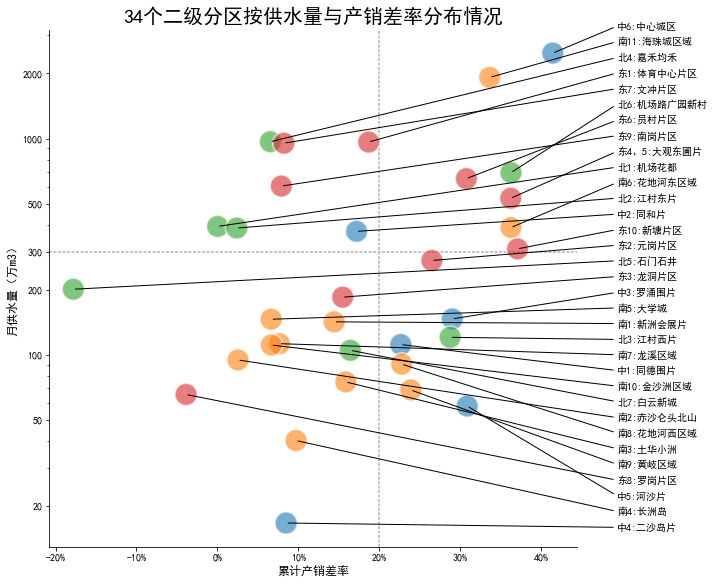

In [12]:
from matplotlib import ticker
g = sns.relplot(
    data=zone4,
    x="综合产销差", y="当月供水量",
    hue="分公司",  height=8, aspect=1,s=500,alpha=.6,legend=False
    )
g.ax.set_title("34个二级分区按供水量与产销差率分布情况",fontsize=20)
g.ax.set(yscale="log")
g.ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
g.ax.set_yticks([20,50,100,200, 300, 500,1000,2000])
g.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
g.map(plt.axhline, y=300, color=".7", dashes=(2, 1), zorder=0)
g.map(plt.axvline, x=0.20, color=".7", dashes=(2, 1), zorder=0)
g.ax.set_xlabel("累计产销差率",fontsize=12)
g.ax.set_ylabel("月供水量（万m3）",fontsize=12)

#g.ax.legend(loc='upper center',ncol=4)
#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)
for i in range(len(zone4)):
    g.ax.annotate(text[i], xy=xy[i], xytext=(g.ax.get_xlim()[1]+0.05,
             np.power(10,np.log10(g.ax.get_ylim()[1])-(np.log10(g.ax.get_ylim()[1])-np.log10(g.ax.get_ylim()[0]))/len(zone4)*i)   
                                            ),
            xycoords='data',
            arrowprops=dict( arrowstyle = "-",relpos=(0,0.5))
            )
    
g.savefig(r'c:\Users\XieJie\Desktop\34个二级分区分布.svg')

In [28]:
#分公司分布图
zone3 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=6)
zone3 = zone3[~np.isnan(zone3['累计产销差率'])]
zone3

,分公司,编号,片区名称,年份,累计产销差率
0,中区,中1,同德围片,2020年,20.09
1,中区,中2,同和片,2020年,12.77
2,中区,中3,罗涌围片,2020年,25.30
3,中区,中4,二沙岛片,2020年,18.09
4,中区,中5,河沙片,2020年,50.77
...,...,...,...,...,...
63,北区,北3,江村西片,2021年,28.75
64,北区,北4,嘉禾均禾,2021年,6.54
65,北区,北5,石门石井,2021年,-17.80
66,北区,北6,机场路广园新村,2021年,36.26


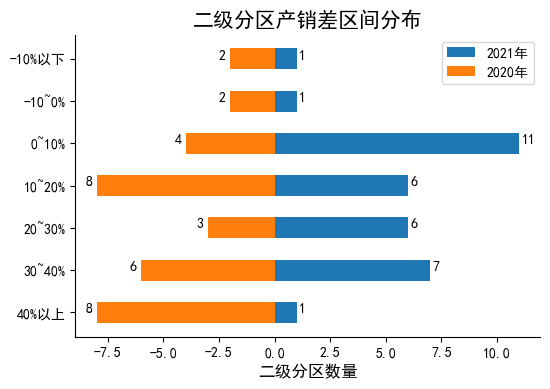

In [79]:
#f, axes = plt.subplots(2,2, figsize=(6, 4),sharex=True)
#sns.kdeplot(data=zone3 , x="累计产销差率", hue="月份",ax=axes[0,1])#类别画图函数可以分面。专项绘图函数不行。
#sns.despine(left=True) #移除边框
cxc_2020 = zone3.query("年份=='2020年'")
cxc_2020=pd.cut(cxc_2020['累计产销差率'], bins=[-np.inf,-10,0,10,20,30,40,np.inf],labels=['-10%以下','-10~0%','0~10%','10~20%','20~30%','30~40%','40%以上'])
cxc_2020=cxc_2020.value_counts(dropna=False).sort_index(ascending=False)

cxc_2021 = zone3.query("年份=='2021年'")
cxc_2021=pd.cut(cxc_2021['累计产销差率'], bins=[-np.inf,-10,0,10,20,30,40,np.inf],labels=['-10%以下','-10~0%','0~10%','10~20%','20~30%','30~40%','40%以上'])
cxc_2021=cxc_2021.value_counts(dropna=False).sort_index(ascending=False)
fig,ax= plt.subplots(figsize=(6,4),dpi=100)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False) #把右边的边框颜色设置为无色,隐藏右边框
ax.spines['top'].set_visible(False)#把上边的边框颜色设置为无色,隐藏上边框
#ax.spines['bottom'].set_visible(False)
#ax.xaxis.set_visible(False)
#ax.tick_params(axis=u'both', which=u'both',length=0)
#ax.spines['bottom'].set_visible(False) #把上边的边框颜色设置为无色,隐藏上边框
#ax.yaxis.set_ticks_position('left') #指定左边的边为 y 轴
#ax.spines['left'].set_position(('data', 0)) 
plt.barh(cxc_2021.index,cxc_2021,height=0.5,label='2021年')
plt.barh(cxc_2020.index,-cxc_2020,height=0.5,label='2020年')

for i in cxc_2021.index:
    plt.text(cxc_2021[i]+0.1,i,cxc_2021[i])    
for i in cxc_2020.index:
    plt.text(-cxc_2020[i]-0.5,i,cxc_2020[i])
    
ax.set_title("二级分区产销差区间分布",fontsize=15)
ax.set_xlabel("二级分区数量",fontsize=12)
ax.legend(loc='best')
#handles, labels = ax.get_legend_handles_labels()
#order = [1,0]
#fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,columnspacing=6,markerscale=2,bbox_to_anchor=(0.85, 1),ncol=2,handletextpad=0.1)
plt.savefig(r'c:\Users\XieJie\Desktop\对标.svg')

Text(0.5, 0, '累计产销差率（%）')

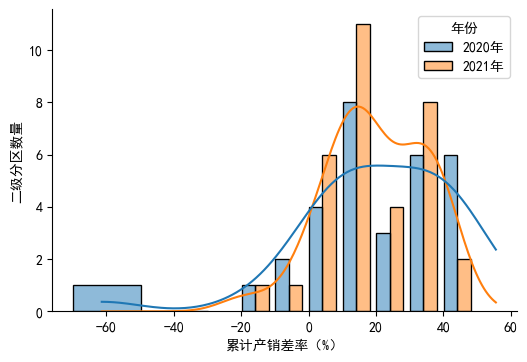

In [7]:

fig=plt.figure(figsize=(6,4),dpi=100)
#fig.suptitle("我是画布的标题",fontsize=20)
g=sns.histplot(data=zone3 , x="累计产销差率", bins=[-70,-20,-10,0,10,20,30,40,50],hue="年份",multiple='dodge',shrink=.8,kde=True)
sns.despine() #移除边框
#plt.xticks([-16,-6,4,14,24,34,44],labels=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上'])
plt.ylabel('二级分区数量')
plt.xlabel('累计产销差率（%）')
#plt.title('测试')
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",kind="kde",height=5,aspect=1.5)#必须用细项函数才可以写到axes里面,一个图不加ax索引，单行列图只加一个索引。
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.legend.set_title("")

In [ ]:
#g = sns.FacetGrid(zone3,col="分公司",hue="月份", height=10)
#g.map(sns.kdeplot, "累计产销差率")
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",col="分公司" ,kind="kde",col_wrap=2)
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.set(ylabel='二级分区集中度')

f, axes = plt.subplots(2,2, figsize=(12, 10),dpi=100)
ax1,ax2,ax3,ax4=axes.flatten()
bins=[-20,-10,0,10,20,30,40,50]
xticks=[-16,-6,4,14,24,34,44]
xlabel=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上']

sns.histplot(data=zone3.query("分公司 == '中区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabel)
ax1.set_xlabel('')
ax1.set_ylabel('二级分区数量')
ax1.set_title('中区')

sns.histplot(data=zone3.query("分公司 == '东区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax2)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabel)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('东区')

sns.histplot(data=zone3.query("分公司 == '南区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax3)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xlabel)
ax3.set_xlabel('累计产销差（%）')
ax3.set_ylabel('二级分区数量')
ax3.set_title('南区')

sns.histplot(data=zone3.query("分公司 == '北区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax4)
ax4.set_xticks(xticks)
ax4.set_xticklabels(xlabel)
ax4.set_xlabel('累计产销差（%）')
ax4.set_ylabel('')
ax4.set_title('北区')

sns.despine() #移除边框
f.tight_layout()

In [ ]:
#中东南北贡献度饼图
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

recipe = ["0.17 百分点 中区",
          "1.06 百分点 东区",
          "0.21 百分点 南区",
          "1.04 百分点 北区"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [ ]:
#完成售水计划比例图
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
Sys.setlocale('LC_ALL', locale = "English_United States.1252") #字符编码由GBk改成utf-8
library(ggplot2) 
library(reshape2)

data <- read.csv(file="C://Users//Jay//mypyworks//dumbbell.csv",header = T,check.names=F)


# 注释：将原始的宽数据变成长数据，方便画图
data_melt <- melt(data,id.vars = "gene")


%%R 
order <- c("gene1","gene2","gene3","gene4","gene5","gene6","gene7","gene8","gene9","gene10")
order <- rev(order)
p <- ggplot(data_melt,aes(x=value , y= gene)) +  
  geom_line(aes(group = gene)) +
  geom_point(aes(fill=variable), shape = 21, size = 9) +
  scale_y_discrete(limits = order)
p

In [ ]:
%R -o data_melt